We did a quick tour of Python and saw some of its features earlier in today's class. Let us now see what off-the-shelf support exists in terms of NLP tools in Python in the rest of this class, and some of next class.

Before we get into NLP methods in depth, let us first look at how to do basic corpus analysis in Python. That is the goal of this notebook. 

Based on: 
- Chapters 1--3 in NLTK. (Chapters 1--7 may be useful for non NLP focused folks, generally, IMO)

Other useful resources:
- Python worksheets in Katrin Erk's NLP courses: https://www.katrinerk.com/teaching/resources 

# Why?
The first step before we build any NLP models is to "understand" the data a little bit.

What is "understanding" the data?
    - Looking at frequently used words/ngrams in the data
    - Looking at collocations (what words go together)
    - How can we visualize text corpora?
    - lexical diversity, linguistic coverage etc in the dataset
    
Why do we need this?
    - To get a general idea of what the texts are about
    - Identify potentially useful features to use in an NLP model that uses this data
    - Identify potential noise in the data
    - Understand limitations of the data (e.g., potential bias) 

## Installing necessary libraries 
Before proceeding further, we have to install the necessary Python libraries (libraries can be thought of as a collection of pre-implemented utilities we can just use right away)

- nltk
- matplotlib (for plots)

installing libraries in python happens through a command called pip

In [1]:
!pip install nltk
!pip install matplotlib

#the ! symbol lets us run programs that are typically run from a command line tool in a notebook.

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
#If you are able to import these libraries without errors, that means you installed them correctly
import nltk
import matplotlib

## Download the required language resources for nltk and spacy

In [3]:
nltk.download("book")
#Download any data or other non-code resources we need for using the code in the book.

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/Vajjalas/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/Vajjalas/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /Users/Vajjalas/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/Vajjalas/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /Users/Vajjalas/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /Users/Vajjalas/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data

True

# Elementary Text Analysis 

I will use NLTK library's existing functions to illustrate some text analysis functions in Python. The following examples are based on Chapter 1. 

I will start with reading a text file from the web. This is the file: https://www.gutenberg.org/files/2446/2446-0.txt
(I don't have any agenda - I just like this play, so chose it).

In [4]:
from urllib import request
#urllib is a built-in python library for handling web interactions such as accessing a web-page, reading its contents etc.
myurl = "https://www.gutenberg.org/files/2446/2446-0.txt"
response = request.urlopen(myurl)
mytext = ""
for line in response:
    mytext += line.decode("utf-8").strip() + "\n"
    
print(mytext)

﻿
The Project Gutenberg EBook of An Enemy of the People, by Henrik Ibsen

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: An Enemy of the People

Author: Henrik Ibsen

Translator: R. Farquharson Sharp

Release Date: December, 2000 [EBook #2446]
Last updated: May 1, 2019

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK AN ENEMY OF THE PEOPLE ***



Produced by Martin Adamson.  HTML version by Al Haines.



AN ENEMY OF THE PEOPLE



A play in five acts



by



Henrik Ibsen



Translated by R. Farquharson Sharp


Contents


ACT I
ACT II
ACT III
ACT IV
ACT V


DRAMATIS PERSONAE

Dr. Thomas Stockmann, Medical Officer of the Municipal Baths.
Mrs. Stockmann, his wife.
Petra (their daughter) a teacher.
Ejlif & Morten (their sons, aged 13 and 1

In [5]:
from nltk.text import Text
from nltk.tokenize import sent_tokenize, word_tokenize

text_nltk = Text(word_tokenize(mytext.lower()))

In [6]:
text_nltk

<Text: ﻿ the project gutenberg ebook of an enemy...>

There are many ways to examine the context of a text apart from simply reading it. A concordance view shows us every occurrence of a given word, together with some context. Here we look up the word "town" in this text. This can be done by calling a pre-implemented utility for NLTK Text objects, called "concordance", as follows:



In [7]:
text_nltk.concordance("town")

Displaying 25 of 82 matches:
or 's elder brother ) , mayor of the town and chief constable , chairman of th
 the action takes place in a coastal town in southern norway , an enemy of the
 life and some business doing in the town . houses and landed property are ris
waving the letter ) . well , now the town will have something new to talk abou
't it the universal opinion that our town is a healthy spot ? hovstad . certai
alled them the `` main artery of the town 's life-blood , '' the `` nerve-cent
lood , '' the `` nerve-centre of our town , '' and the devil knows what else— 
il knows what else— billing . `` the town 's pulsating heart '' was the expres
suppose i was going to run about the town gossiping about it , before i had ab
 ) there will be a nice upset in the town , katherine ; you ca n't imagine wha
 going to be the foremost man in the town ! dr. stockmann ( walking about happ
ing . hovstad , do n't you think the town ought to give dr. stockmann some sor
 he has done a service 

A concordance permits us to see words in context. What other words appear in a similar range of contexts? We can use "similar" function for a given text:

In [8]:
text_nltk.similar("people")

town baths crowd community mayor table matter doctor room door money
world deuce badger project you it men meeting hall


In [9]:
text_nltk.similar("stockmann")

hovstad is and that it if you what know aslaksen but for petra me
thomas peter have well now here


It is one thing to automatically detect that a particular word occurs in a text, and to display some words that appear in the same context. However, we can also determine the location of a word in the text: how many words from the beginning it appears. This positional information can be displayed using a dispersion plot. 

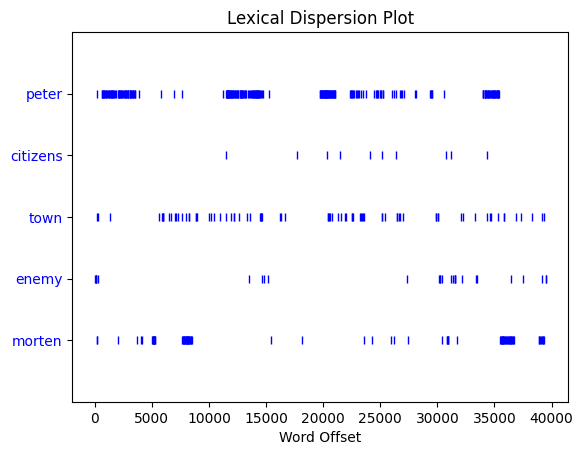

In [10]:
text_nltk.dispersion_plot(["peter", "citizens", "town", "enemy", "morten"])

# Counting Vocabulary

Counting words, getting their frequencies etc are all useful functions when we start doing some NLP based analyses with text data. Let us see some simple utilities here. 

Let's begin by finding out the length of a text from start to finish, in terms of the words and punctuation symbols that appear. We use the term len to get the length of something, which we'll apply here to the our text_nltk variable:

In [11]:
len(text_nltk) 

42789

So this text has 42789 words and punctuation symbols, or "tokens." A token is the technical name for a sequence of characters — such as hairy, his, or :) — that we want to treat as a group. When we count the number of tokens in a text, say, the phrase to be or not to be, we are counting occurrences of these sequences. Thus, in our example phrase there are two occurrences of to, two of be, and one each of or and not. 

How many unique tokens does this text have, though? In Python we can obtain that information using the set() function. When you do this, many screens of words will fly past. Now try the following:



In [12]:
sorted(set(text_nltk))
len(set(text_nltk))
#Why am I seeing only one number instead of two?

4188

In [13]:
sorted(set(text_nltk))


['!',
 '#',
 '$',
 '%',
 '&',
 "'",
 "''",
 "'as-is",
 "'ll",
 "'m",
 "'s",
 '(',
 ')',
 '*',
 ',',
 '-',
 '--',
 '-ahem',
 '-sh',
 '.',
 '...',
 '.—and',
 '//gutenberg.org/license',
 '//pglaf.org',
 '//pglaf.org/donate',
 '//pglaf.org/fundraising',
 '//www.gutenberg.org',
 '//www.gutenberg.org/2/4/4/2446/',
 '//www.pglaf.org',
 '1',
 '1.',
 '1.a',
 '1.b',
 '1.c',
 '1.d',
 '1.e',
 '1.e.1',
 '1.e.2',
 '1.e.3',
 '1.e.4',
 '1.e.5',
 '1.e.6',
 '1.e.7',
 '1.e.8',
 '1.e.9',
 '1.f',
 '1.f.1',
 '1.f.2',
 '1.f.3',
 '1.f.4',
 '1.f.5',
 '1.f.6',
 '10',
 '13',
 '1500',
 '1st',
 '2.',
 '20',
 '2000',
 '2001',
 '2019',
 '2446',
 '2446-0.txt',
 '2446-0.zip',
 '2nd',
 '3',
 '3.',
 '30',
 '3rd',
 '4',
 '4.',
 '4557',
 '4th',
 '5,000',
 '5.',
 '50',
 '501',
 '596-1887',
 '60',
 '64-6221541.',
 '801',
 '809',
 '84116',
 '90',
 '99712.',
 ':',
 ';',
 '?',
 '@',
 '[',
 ']',
 '``',
 'a',
 'abandon',
 'abated',
 'abide',
 'ability',
 'able',
 'abnormal',
 'abominations',
 'about',
 'about—',
 'above',
 'abro

Now, let's calculate a measure of the **lexical richness** of the text. One way of getting this is by looking at the percentage of unique tokens to the total number of tokens in the text. The more the number is, the higher the lexical richness is. 


In [14]:
100*len(set(text_nltk)) / len(text_nltk)

9.787562223936058

We can perhaps say that the vocabulary in this piece of text is "less varied"

Next, let's focus on particular words. We can count how often a word occurs in a text, and compute what percentage of the text is taken up by a specific word:



In [15]:
print(text_nltk.count("petra"))

print(100 * text_nltk.count('stockmann') / len(text_nltk))

126
2.030895790974316


# texts and lists

In NLP, we commonly see a piece of text being represented as a list of sentences/tokens, and a list of sentences further represented as a list of tokens. It is important to note that there are no perfect sentence splitters or word tokenizers. There are different options around, some are tailored to specific use cases (e.g., NLTK has a tweet tokenizer among others). In this section, we will see a few examples of word and sentence tokenization from nltk. 

In [16]:
#NLTK has pre-implemented functions to split a text into sentences, and sentences into tokens. 
from nltk.tokenize import sent_tokenize, word_tokenize

In [17]:
all_sens = sent_tokenize(mytext) #i am taking the raw mytext variable directly, not text_nltk.
len(all_sens)

4242

In [18]:
all_sens[233] #looking at a random sentence.


'May I ask what they will find here to "stir up," as\nyou put it?'

In [19]:
words_in_a_sentence = word_tokenize(all_sens[233])
print(words_in_a_sentence)

['May', 'I', 'ask', 'what', 'they', 'will', 'find', 'here', 'to', '``', 'stir', 'up', ',', "''", 'as', 'you', 'put', 'it', '?']


## Computing simple statistics from a text

In [20]:
from nltk import FreqDist

In [21]:
fdist1 = FreqDist(text_nltk)
print(fdist1)

<FreqDist with 4188 samples and 42789 outcomes>


In [22]:
fdist1.most_common(10)

[('.', 3252),
 (',', 1900),
 ('the', 1592),
 ('to', 958),
 ('you', 936),
 ('stockmann', 869),
 ('i', 843),
 ('of', 805),
 ('a', 710),
 ('and', 707)]

In [23]:
fdist1["petra"]

126

In [24]:
# Selecting words longer than 15 characters.
myvocab = set(text_nltk)

long_words = [w for w in myvocab if len(w) > 15]

long_words

['well-ascertained',
 '//www.gutenberg.org/2/4/4/2446/',
 'delighted—delighted',
 'comfortable—plenty',
 'trademark/copyright',
 'misrepresentation',
 'www.gutenberg.org',
 'mincemeat—fatheads',
 '//www.gutenberg.org',
 'womanish—damnably',
 'father—dismissed',
 'fellow-citizens—out',
 'standard-bearers—those',
 'unexpectedly—you',
 'time—unfortunately',
 'imprudent—almost',
 '//gutenberg.org/license',
 'visitors—typhoid',
 'misrepresentation—',
 'peter—slow-witted',
 'katherine—something',
 'well-intentioned',
 'wrong—absolutely',
 'broad-mindedness',
 'unenforceability',
 'fellow-citizens—a',
 'acknowledge—that',
 'entire—firm—inconceivable',
 '//pglaf.org/donate',
 '//pglaf.org/fundraising',
 'side—unfortunately',
 'thereabouts—because',
 'self-opinionated',
 'public—householders']

Exercise: What are other ways of writing the same line of code for long_words?

In [25]:
# Words that appear more than 10 times and less than 20 times

mylist = [w for w in myvocab if fdist1[w] > 10 and fdist1[w] < 20]
print(len(mylist))
mylist[:10]

150


['license',
 'duty',
 'still',
 'writing',
 'talk',
 'money',
 'agreement',
 'calls',
 'free',
 'world']

In [26]:
#The following piece of code does the same too:
mylist = [w for w in myvocab if fdist1[w] in range(11,20)]
print(len(mylist))
mylist[:10]

150


['license',
 'duty',
 'still',
 'writing',
 'talk',
 'money',
 'agreement',
 'calls',
 'free',
 'world']

In [27]:
#And, what about this?
mylist = [w for w in myvocab if fdist1[w] in range(10,20)]
print(len(mylist))
mylist[:10]

185


['afraid',
 'license',
 'duty',
 'still',
 'writing',
 'idea',
 'goodbye',
 'perfectly',
 'talk',
 'money']

Question: Why are these both different? 

## Collocations, ngrams and other counts

ngrams are sequences of n words that appear together. Bigrams are pairs of words that appear one after another. Collocations are frequent bigrams

In [33]:
from nltk import bigrams
bigrams_list = list(bigrams(text_nltk))

In [34]:
len(bigrams_list)

42788

In [35]:
bigrams_list[22]

('anyone', 'anywhere')

In [36]:
text_nltk.collocations()

dr. stockmann; peter stockmann; mrs. stockmann; project gutenberg-tm;
morten kiil; project gutenberg; captain horster; mr. hovstad; literary
archive; gutenberg-tm electronic; electronic works; archive
foundation; gutenberg literary; united states; medical officer;
compact majority; water supply; public opinion; set forth; native town


In [37]:
text_nltk.collocation_list()

[('dr.', 'stockmann'),
 ('peter', 'stockmann'),
 ('mrs.', 'stockmann'),
 ('project', 'gutenberg-tm'),
 ('morten', 'kiil'),
 ('project', 'gutenberg'),
 ('captain', 'horster'),
 ('mr.', 'hovstad'),
 ('literary', 'archive'),
 ('gutenberg-tm', 'electronic'),
 ('electronic', 'works'),
 ('archive', 'foundation'),
 ('gutenberg', 'literary'),
 ('united', 'states'),
 ('medical', 'officer'),
 ('compact', 'majority'),
 ('water', 'supply'),
 ('public', 'opinion'),
 ('set', 'forth'),
 ('native', 'town')]

Counting words is useful, but we can count other things too. For example, we can look at the distribution of word lengths in a text, by creating a FreqDist out of a long list of numbers, where each number is the length of the corresponding word in the text:



In [38]:
dist = FreqDist([len(w) for w in text_nltk]) 

In [39]:
dist

FreqDist({1: 9028, 3: 7847, 2: 6995, 4: 6404, 5: 3535, 6: 2329, 7: 2282, 9: 1811, 8: 1195, 10: 585, ...})

In [40]:
len(dist)

23

In [41]:
dist[21] #seeing how many 21 character tokens exist

0

In [42]:
dist.max() #What is this doing? 

1

In [43]:
100*dist.freq(5)

8.261469069153287

i.e., words of length 5 occupy about 8% of the text

In [44]:
100*dist.freq(19)

0.01635934469139265

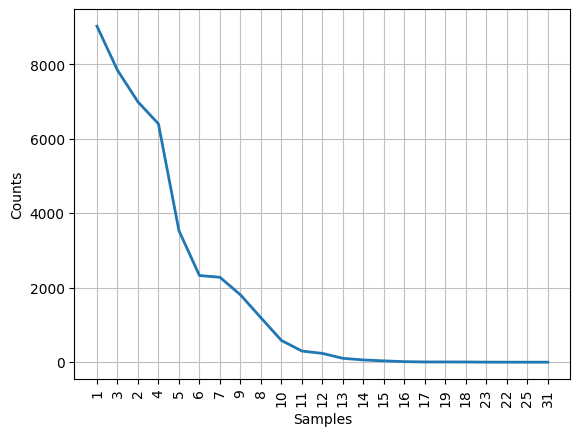

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [45]:
dist.plot()

Exercise: Think about how you can extract trigrams and their frequency distribution, based on what you learnt so far, and exploring a little bit of NLTK!

let us take a quick 5 minutes break here, and I will wrap up today's class with a short overview of another useful concept - regular expressions. 